In [1]:
%display latex

# DIN-5034-2-Algorithmus

Der DIN-Algorithmus ist für die Berechnung der Sonneneinstrahlung in Innenräume entwickelt worden.

In [2]:
import datetime as dt

RR.scientific_notation(True)

var('Zeit Stunden') # Zeiteinheit

var('Jahreswinkel J') # Winkel auf der Sonnenumlaufbahn
var('TagDesJahres d')
var('Zeitgleichung ZG')
var('Sonnendeklination delta') # Sonnendeklination
var('LZ UTC WOZ MOZ') # Zeitangaben: Lokalzeit, koordinierte Weltzeit, wahre und mittlere Ortszeit
var('Zeitzone ZZ')
var('Laengengrad')
var('l', latex_name='\lambda')
var('Breitengrad varphi')
var('Stundenwinkel')
var('Sonnenhoehe gamma')
var('Sonnenazimut alpha')
var('Luftmasse LM')

# Faktoren und Konstanten
Grad = pi/180
Minuten = Stunden / 60
ZahlDerTageImJahr = 365

Der **Jahreswinkel** $J$:

In [3]:
J_eqn = J == 360 * Grad * TagDesJahres / ZahlDerTageImJahr;
pretty_print(J_eqn(TagDesJahres=d))

J == 2/365*pi*d

die **Sonnendeklination** $\delta$:

In [4]:
delta_eqn = delta == (0.3948 
                        - 23.2559 * cos(J + 9.1 * Grad)
                        - 0.3915 * cos(2 * J + 5.4 * Grad)
                        - 0.1764 * cos(3 * J + 26. * Grad)
                     ) * Grad;
pretty_print(delta_eqn.factor())

delta_eqn = solve([delta_eqn, J_eqn], J, delta)[-1][-1].factor()
#pretty_print(delta_eqn(TagDesJahres=d))

delta == -1/1800000*pi*(1764*cos(13/90*pi + 3*J) + 232559*cos(91/1800*pi + J) + 3915*cos(3/100*pi + 2*J) - 3948)

An diesen Gleichungen wird bereits deutlich, dass der Algorithmus nur ungefähre Ergebnisse liefern kann, da das Konzept der Schaltjahre und Schaltsekunden nicht berücksichtigt wird.

Die sogenannte **Zeitgleichung** $ZG$ beschreibt die Abweichung der **wahren Ortszeit** $WOZ$ von der **mittleren Ortszeit** $MOZ$.
Die mittlere Ortszeit ist relativ zur **koordinierten Weltzeit** $UTC$ definiert und hängt vom **Längengrad** $\lambda$ ab.
Mit der Angabe der **Zeitzone** $ZZ$ ist auch die **lokale Zeit** $LZ$ gegeben:

In [5]:
ZG_def = ZG == WOZ - MOZ;
ZG_eqn = ZG == (0.0066 
                    + 7.3525 * cos(J + 85.9 * Grad)
                    + 9.9359 * cos(2 * J + 108.9 * Grad)
                    + 0.3387 * cos(3 * J + 105.2 * Grad)
               ) * Minuten;
pretty_print(ZG_def)
pretty_print(ZG_eqn.factor())

ZG_eqn = solve([ZG_eqn, J_eqn], J, ZG)[-1][-1].factor()
#pretty_print(ZG_eqn(TagDesJahres=d))

LZ_eqn = LZ == UTC + ZZ
MOZ_eqn = MOZ == UTC - 4 * Minuten/(1 * Grad) * Laengengrad
MOZ_eqn = solve([MOZ_eqn, LZ_eqn], UTC, MOZ)[-1][-1].expand()
pretty_print(MOZ_eqn(Laengengrad=l))

ZG == -MOZ + WOZ

ZG == 1/600000*Stunden*(99359*cos(121/200*pi + 2*J) + 3387*cos(263/450*pi + 3*J) + 73525*cos(859/1800*pi + J) + 66)

MOZ == LZ - ZZ - 12*Stunden*l/pi

Aus der Definition und einer empirischen Zeitgleichung kann die wahre Ortszeit bestimmt werden:

In [6]:
WOZ_eqn = solve([ZG_def, ZG_eqn], ZG, WOZ)[-1][-1]
WOZ_eqn = solve([WOZ_eqn, MOZ_eqn], MOZ, WOZ)[-1][-1].expand()
pretty_print(WOZ_eqn(TagDesJahres=d, Laengengrad=l))

WOZ == 99359/600000*Stunden*cos(121/200*pi + 4/365*pi*d) + 1129/200000*Stunden*cos(263/450*pi + 6/365*pi*d) + 2941/24000*Stunden*cos(55217/115705*pi + 2/365*pi*d) + LZ + 11/100000*Stunden - ZZ - 12*Stunden*l/pi

Der **Stundenwinkel**:

In [7]:
Stundenwinkel_eqn = Stundenwinkel == (12 * Stunden - WOZ) * 15 * Grad / Stunden;
pretty_print(Stundenwinkel_eqn.expand())

Stundenwinkel_eqn = solve([Stundenwinkel_eqn, WOZ_eqn], WOZ, Stundenwinkel)[-1][-1].expand()
#pretty_print(Stundenwinkel_eqn(TagDesJahres=d, Laengengrad=l))

Stundenwinkel == pi - 1/12*pi*WOZ/Stunden

Mit der **geographischen Breite $\varphi$** lassen sich **Sonnenhöhe** $\gamma$ und -**azimut** $\alpha$ berechnen:

In [8]:
Sonnenhoehe_eqn = Sonnenhoehe == arcsin(
    cos(Stundenwinkel) * cos(Breitengrad) * cos(delta)
    + sin(Breitengrad) * sin(delta)
    );
pretty_print(Sonnenhoehe_eqn(Laengengrad=l, Breitengrad=varphi))

Sonnenhoehe_eqn = solve([Sonnenhoehe_eqn, Stundenwinkel_eqn], Stundenwinkel, Sonnenhoehe)[-1][-1]
Sonnenhoehe_eqn = solve([Sonnenhoehe_eqn, delta_eqn], delta, Sonnenhoehe)[-1][-1]
#pretty_print(Sonnenhoehe_eqn(TagDesJahres=d, Laengengrad=l, Breitengrad=varphi))

Sonnenhoehe == arcsin(cos(Stundenwinkel)*cos(delta)*cos(varphi) + sin(delta)*sin(varphi))

In [9]:
Sonnenazimut_eqn = Sonnenazimut == (180 * Grad 
    + sign(WOZ/Stunden - 12)
    * arccos(
        (sin(Sonnenhoehe) * sin(Breitengrad) - sin(delta))
        / (cos(Sonnenhoehe) * cos(Breitengrad))
        )
    );
pretty_print(Sonnenazimut_eqn(Breitengrad=varphi))
Sonnenazimut_eqn = solve([Sonnenazimut_eqn, Sonnenhoehe_eqn], Sonnenhoehe, Sonnenazimut)[-1][-1]
Sonnenazimut_eqn = solve([Sonnenazimut_eqn, WOZ_eqn], WOZ, Sonnenazimut)[-1][-1]
Sonnenazimut_eqn = solve([Sonnenazimut_eqn, delta_eqn], delta, Sonnenazimut)[-1][-1]
#pretty_print(Sonnenazimut_eqn(TagDesJahres=d, Laengengrad=l, Breitengrad=varphi))

Sonnenazimut == pi + arccos((sin(Sonnenhoehe)*sin(varphi) - sin(delta))/(cos(Sonnenhoehe)*cos(varphi)))*sgn(WOZ/Stunden - 12)

## Heutiger Sonnenweg und jetziger Sonnestand

Der heutige Sonnenweg am DBI-TZ kann mit den gegebenen Gleichungen bestimmt werden. Ein Vergleich kann mit dem Online-Angebot von [Sonnenverlauf.de](https://www.sonnenverlauf.de/#/50.93,13.35,17/2018.12.07/09:15/1/0) vorgenommen werden.

In [10]:
LON = -13.35 * Grad
LAT = 50.93 * Grad

Sonnenhoehe_hier = Sonnenhoehe_eqn(Laengengrad=LON, Breitengrad=LAT).factor()
Sonnenazimut_hier = Sonnenazimut_eqn(Laengengrad=LON, Breitengrad=LAT).factor()
WOZ_hier = WOZ_eqn(Laengengrad=LON)

Zurzeit gilt die **Mitteleuropäische Normalzeit** $MEZ$:

In [11]:
MEZ = + 1 * Stunden
MESZ = + 2 * Stunden

Jetzt = dt.datetime.utcnow() + dt.timedelta(hours = int(MEZ / Stunden));
Heute = (Jetzt.date() - dt.date(Jetzt.year,1,1)).days + 1;

LokaleZeit = (Jetzt.hour + Jetzt.minute/60) * Stunden;

In [12]:
WOZ_jetzt = (WOZ_hier(TagDesJahres=Heute, LZ=LokaleZeit, ZZ=MEZ)/Stunden).expand()

Mit dem **Tag des Jahres** ergibt sich:

In [13]:
J_heute = J_eqn(TagDesJahres=Heute).rhs()
delta_heute = delta_eqn(TagDesJahres=Heute).rhs()
ZG_heute = ZG_eqn(TagDesJahres=Heute).rhs()

In [14]:
pretty_print(   'Seit Beginn des Tages sind {:.1f} Stunden vergangen.\n'
                'Heute haben wir den {}. Tag des Jahres.\n'
                'Die Erde hat seit Begin des Jahres {:.1f} Grad auf der Sonnenumlaufbahn zurückgelegt.\n'
                'Die Abweichung des Sonnenstandes ist heute etwa {:.1f} Grad.\n'
                'Die Sonnenzeit weicht heute {:.1f} Minuten von der lokalen Zeit ab.'.format(
                    float(LokaleZeit/Stunden),
                    Heute,
                    float(J_heute/Grad),
                    float(delta_heute/Grad),
                    float(ZG_heute/Minuten))
            )

'Seit Beginn des Tages sind 12.8 Stunden vergangen.\nHeute haben wir den 341. Tag des Jahres.\nDie Erde hat seit Begin des Jahres 336.3 Grad auf der Sonnenumlaufbahn zur\xc3\xbcckgelegt.\nDie Abweichung des Sonnenstandes ist heute etwa -22.5 Grad.\nDie Sonnenzeit weicht heute 8.4 Minuten von der lokalen Zeit ab.'

Über das Jahr gesehen hat die **Abweichung** folgenden Verlauf.

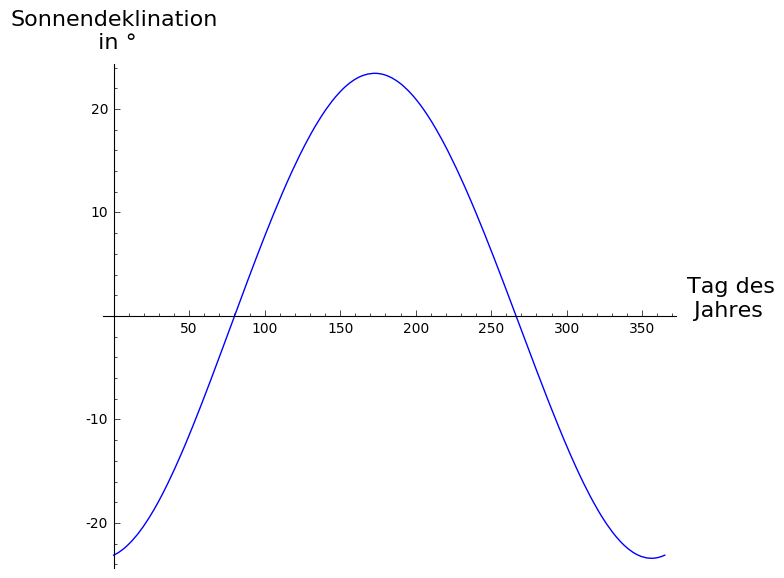

In [15]:
Deltadiagram = plot(delta_eqn.rhs()/Grad, 0, 365)
Deltadiagram.axes_labels(['Tag des\n Jahres',u'Sonnendeklination\n in °'])
Deltadiagram

Über das Jahr gesehen hat die **Zeitgleichung** folgenden Verlauf.

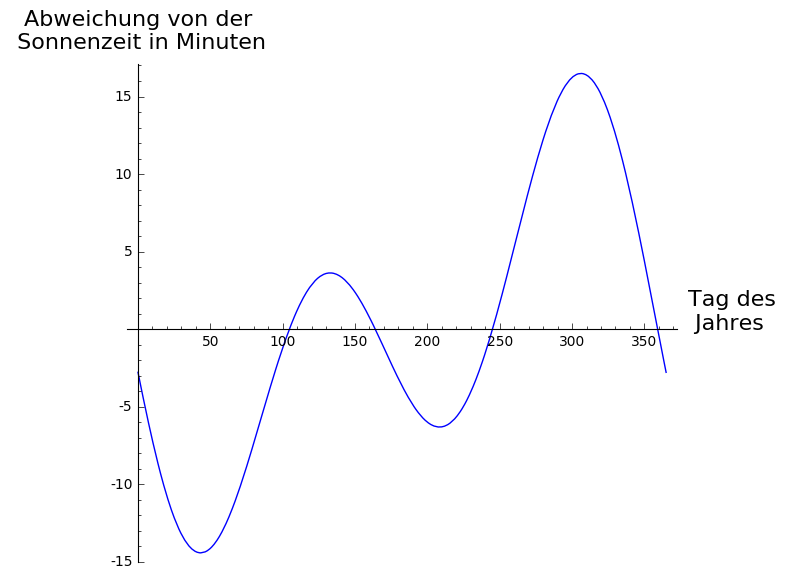

In [16]:
Zgldiagramm = plot(ZG_eqn.rhs()/Minuten, 0, 365)
Zgldiagramm.axes_labels(['Tag des\n Jahres','Abweichung von der\n Sonnenzeit in Minuten'])
Zgldiagramm

Für **heute**:

In [17]:
SH = (Sonnenhoehe_hier(TagDesJahres=Heute, ZZ=MEZ, LZ=LZ*Stunden).rhs()/Grad).function(LZ)

In [18]:
Hoehe = SH(LokaleZeit/Stunden).n()
pretty_print('Zur Zeit steht die Sonne in einem Winkel von etwa {:.1f} Grad ueber dem DBI-TZ.'.format(float(Hoehe)))

'Zur Zeit steht die Sonne in einem Winkel von etwa 15.8 Grad ueber dem DBI-TZ.'

Natürlich können wir mit unseren Gleichungen auch den Zeitpunkt des Sonnenauf- und -untergangs berechnen, indem wir die Nulldurchgänge der Sonnenhöhe am Vormittag und Nachmittag bestimmen.

In [19]:
Sonnenaufgang = find_root(SH,0,12)
Sonnenuntergang = find_root(SH,12,24)

pretty_print('Sonnenaufgang war etwa um {:%H:%M} und Sonnenuntergang wird etwa um {:%H:%M} sein.'.format(
                dt.datetime.utcfromtimestamp(float(Sonnenaufgang*3600))
                ,dt.datetime.utcfromtimestamp(float(Sonnenuntergang*3600))
                )
            )

'Sonnenaufgang war etwa um 08:01 und Sonnenuntergang wird etwa um 15:55 sein.'

Wir können auch den Sonnenhöchststand ermitteln, indem wir die folgende Extremwertaufgabe lösen.

In [20]:
Mittag = find_root(SH.diff(LZ),Sonnenaufgang,Sonnenuntergang)
pretty_print('Der Sonnenhöchststand ist heute um {:%H:%M}.'.format(
                dt.datetime.utcfromtimestamp(float(Mittag*3600))
                )
            )

'Der Sonnenh\xc3\xb6chststand ist heute um 11:58.'

In [21]:
SA = Sonnenazimut_hier(TagDesJahres=Heute, ZZ=MEZ, LZ=LZ*Stunden).rhs()/Grad
SA = SA(Stunden=1).function(LZ) # Die sign-Funktion lässt sich sonst nicht gut vereinfachen.

Azimut = SA(LZ=LokaleZeit/Stunden).n()
pretty_print('Zur Zeit steht die Sonne im Azimut von {:.1f} Grad.'.format(float(Azimut)))

'Zur Zeit steht die Sonne im Azimut von 191.5 Grad.'

In [22]:
aspectratio = 3
durchmesser = 10
StundenListe = srange(12-6, 12+10, 2)

# Sonnenweg
Sonnenwegdiagram = parametric_plot( (SA(Zeit), SH(Zeit)), (Zeit, Sonnenaufgang, Sonnenuntergang ) )
# Punkte für Stunden
SonnenwegdiagramStunden = point( [(SA(Zeit), SH(Zeit)) for Zeit in StundenListe] )
# Symbol für die Sonne
Sonne = ellipse((Azimut,Hoehe),durchmesser,durchmesser / aspectratio,rgbcolor='yellow', fill=True, legend_label='Die Sonne')

# Grafikobjekt
G = Graphics()
G += Sonnenwegdiagram
G += SonnenwegdiagramStunden
# Beschriftung für Stunden
for Zeit in StundenListe:
    if SH(Zeit) > -5:
        da = 3
        if Zeit < 12: da = -3
        G += text('{}'.format(Zeit),(SA(Zeit) + da, SH(Zeit) + 6 / aspectratio))
G += Sonne

G.axes_range(0,360,0,60)
G.axes_labels(['Azimut',u'Höhe'])
G.set_aspect_ratio(aspectratio)

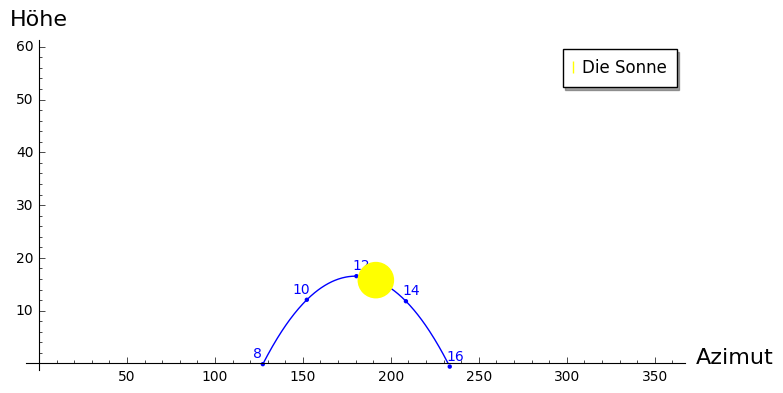

In [23]:
G.show()

## Sonnenstunden
Die Definition der Luftmasse in der Vorlesung $LM = \frac{1}{\sin{\gamma_S}}$ gilt nur für große Winkel $\gamma_S > 30\, °$.
Diese Bedingung ist in unseren Breitengraden selten der Fall.
Deshalb verwenden wir hier eine [Formel](http://www.pveducation.org/pvcdrom/2-properties-sunlight/air-mass),
die die Krümmung der Erdoberfläche berücksichtigt.

In [24]:
# Formel aus der Vorlesung
LM_eqn = Luftmasse == (1/sin(Sonnenhoehe))
pretty_print(LM_eqn(Sonnenhoehe=gamma))

# Alternative Formel
LM_alt = Luftmasse == (1/(cos(90 * Grad - Sonnenhoehe) + 0.50572 * (6.07995 + Sonnenhoehe/Grad)**(-1.6364))).factor()
pretty_print(LM_alt(Sonnenhoehe=gamma))

Luftmasse == (1/sin(gamma))

Luftmasse == 45*(9/20000)^(1591/2500)*((13511*pi + 400000*gamma)/pi)^(4091/2500)/(45*(9/20000)^(1591/2500)*((13511*pi + 400000*gamma)/pi)^(4091/2500)*sin(gamma) + 50572)

In [25]:
SH = Sonnenhoehe_hier(ZZ=MEZ, LZ=LZ*Stunden).rhs()
LM_hier = LM_alt.subs(Sonnenhoehe=SH).rhs()

Anhand des Sonnenweges können die Sonnenstunden eines Jahres und die mittlere Luftmasse ermittelt werden.

In [26]:
ErsterTag = 1
Sonnenstunden = 0
LM_sum = 0
Delta = 0.01

for Heute in srange(ErsterTag, ErsterTag + ZahlDerTageImJahr, 1):
    SH_heute = SH(TagDesJahres=Heute).factor()
    LM_heute = LM_hier(TagDesJahres=Heute).factor()
    Sonnenaufgang = find_root(SH_heute, 0, 12)
    Sonnenuntergang = find_root(SH_heute, 12, 24)
    Sonnenstunden += float(Sonnenuntergang - Sonnenaufgang - 2 * Delta)
    LM_sum += numerical_integral(
                    LM_heute, 
                    Sonnenaufgang + Delta, 
                    Sonnenuntergang - Delta
                )[0]/float(Sonnenuntergang - Sonnenaufgang - 2 * Delta)

In [27]:
pretty_print(   'An diesem Ort gibt es {:.0f} Stunden Tageslicht im Jahr.\n'
                'Die mittlere tägliche Sonnenscheindauer beträgt {:.2f} Stunden.\n'
                'Die mittlere Luftmasse beträgt {:.2f}.'.format(
                    Sonnenstunden,
                    Sonnenstunden/ZahlDerTageImJahr,
                    LM_sum/ZahlDerTageImJahr) 
            )

'An diesem Ort gibt es 4398 Stunden Tageslicht im Jahr.\nDie mittlere t\xc3\xa4gliche Sonnenscheindauer betr\xc3\xa4gt 12.05 Stunden.\nDie mittlere Luftmasse betr\xc3\xa4gt 4.88.'

In Deutschland wird von einer Sonnenscheindauer von $1000$ Stunden pro Jahr ausgegangen.
Um auf die Sonnenscheindauer zu kommen, wird die gleiche Auswertung für die Mittagsstunden wiederholt.

In [28]:
ErsterTag = 1
Sonnenstunden = 0
LM_sum = 0
Delta = 0.01
for Heute in srange(ErsterTag, ErsterTag + ZahlDerTageImJahr, 1):
    SH_heute = SH(TagDesJahres=Heute).factor()
    LM_heute = LM_hier(TagDesJahres=Heute).factor()
    Sonnenaufgang = find_root(SH_heute, 0, 12)
    Sonnenuntergang = find_root(SH_heute, 12, 24)
    Mittag = find_root(SH_heute.diff(LZ), Sonnenaufgang, Sonnenuntergang)
    Mittagsstunden = (Sonnenuntergang - Sonnenaufgang)/4
    Anfangszeit = Mittag - Mittagsstunden/2
    Endzeit = Mittag + Mittagsstunden/2
    Sonnenstunden += float(Mittagsstunden)
    LM_sum += numerical_integral(
                    LM_heute, 
                    Sonnenaufgang + Delta, 
                    Sonnenuntergang - Delta
                )[0]/float(Mittagsstunden)

In [29]:
pretty_print(   'An diesem Ort gibt es {:.0f} Stunden Sonnenschein im Jahr.\n'
                'Die mittlere tägliche Sonnenscheindauer beträgt {:.2f} Stunden.\n'
                'Die mittlere Luftmasse beträgt {:.2f}.'.format(
                    Sonnenstunden,
                    Sonnenstunden/ZahlDerTageImJahr,
                    LM_sum/ZahlDerTageImJahr) 
            )

'An diesem Ort gibt es 1101 Stunden Sonnenschein im Jahr.\nDie mittlere t\xc3\xa4gliche Sonnenscheindauer betr\xc3\xa4gt 3.02 Stunden.\nDie mittlere Luftmasse betr\xc3\xa4gt 1.97.'

Für einen bestimmten Tag des Jahres ergibt sich folgender Verlauf der Luftmasse und der Sonnenhöhe.

In [30]:
Heute = 1 #364/2

SH_heute = SH(TagDesJahres=Heute).factor()
LM_heute = LM_hier(TagDesJahres=Heute).factor()

Sonnenaufgang = find_root(SH_heute, 0, 12)
Sonnenuntergang = find_root(SH_heute, 12, 24)
Mittag = find_root(SH_heute.diff(LZ), Sonnenaufgang, Sonnenuntergang)

print '----------------------'
print 'Zeit\t LM\t SH'
print 'in h\t -\t in °'
print '---------------------'
for Zeit in srange(Sonnenaufgang+0.1,Sonnenuntergang):
    print '{:4.1f}\t{:4.1f}\t{:4.1f}'.format(float(Zeit), float(LM_heute(LZ=Zeit)), float(SH_heute(LZ=Zeit)))
print '---------------------'

----------------------
Zeit	 LM	 SH
in h	 -	 in °
---------------------
 8.4	28.8	 0.0
 9.4	 7.4	 0.1
10.4	 4.6	 0.2
11.4	 3.7	 0.3
12.4	 3.6	 0.3
13.4	 4.0	 0.2
14.4	 5.3	 0.2
15.4	10.7	 0.1
---------------------


----